In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import sklearn.metrics as metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.loss as loss
import mlgrad.gd as gd

In [2]:
digits = load_digits()

In [3]:
Y = np.ascontiguousarray(digits.target)
X = np.ascontiguousarray(digits.data)
print(len(Y))

1797


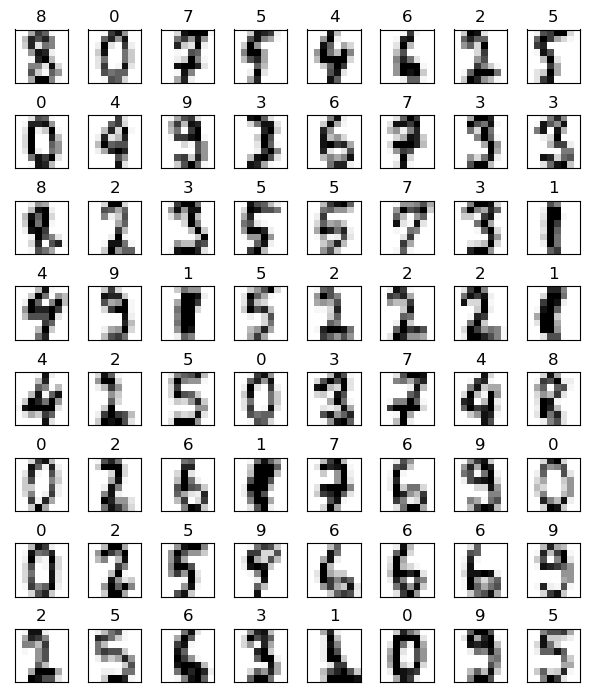

In [5]:
I = np.random.randint(0,len(Y),64)
II = I.reshape(8,8)
plt.figure(figsize=(6,7))
for i in range(8):
    for j in range(8):
        plt.subplot(8,8,8*i+j+1)
        plt.imshow(X[II[i,j]].reshape(8,8), cmap=plt.cm.Greys)
        plt.xticks([])
        plt.yticks([])
        plt.title(str(Y[II[i,j]]))
plt.tight_layout()
plt.show()

In [6]:
I1 = (Y == 1)
I7 = (Y == 7)
X1 = X[I1]
Y1 = np.ones(len(X1), 'd')
X7 = X[I7]
Y7 = -np.ones(len(X7), 'd')

X17 = np.concatenate((X1, X7), axis=0)
Y17 = np.concatenate((Y1, Y7))

N = len(Y17)
print(X17.shape, Y17.shape)

(361, 64) (361,)


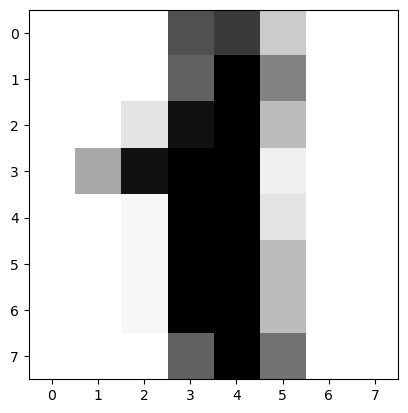

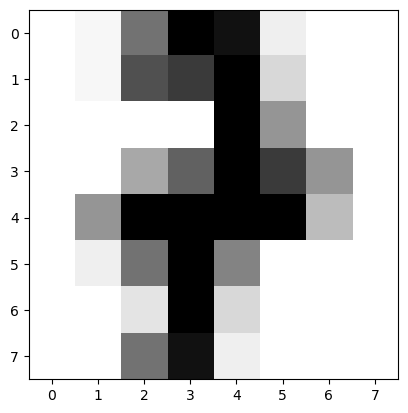

In [7]:
plt.imshow(X17[0].reshape(8,8), plt.cm.Greys)
plt.show()
plt.imshow(X17[-1].reshape(8,8), plt.cm.Greys)
plt.show()

In [6]:
mod = models.LinearModel(64)
hinge_loss = loss.MarginLoss(funcs.Hinge(0.0))

In [19]:
alg = cls.classification_as_regr(X17, Y17, mod,
                                 lossfunc=hinge_loss, 
                                 normalizer=gd.LinearModelNormalizer(),
                                 h=0.01, n_iter=5000)
print(mod.param.base)
print(np.sqrt(np.sum(mod.param.base[1:]**2)))

[ 0.121  0.160 -0.045 -0.061 -0.099 -0.070 -0.068 -0.055 -0.061  0.070
 -0.093  0.045 -0.028  0.106 -0.079 -0.011 -0.127  0.280 -0.081  0.069
  0.049  0.092  0.020 -0.125 -0.186  0.201 -0.010  0.021  0.134 -0.072
 -0.155 -0.091  0.057  0.212 -0.096  0.095 -0.106 -0.062 -0.004 -0.159
  0.159  0.231 -0.109  0.075 -0.031  0.098 -0.059 -0.101  0.025  0.169
 -0.090  0.082  0.024  0.107  0.226  0.190  0.330  0.057 -0.030 -0.065
 -0.060  0.186  0.291  0.142  0.118]
1.0


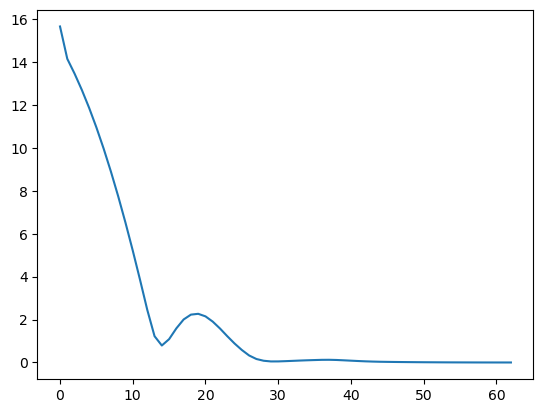

In [20]:
plt.plot(alg.lvals)
plt.show()

In [21]:
metrics.accuracy_score(Y17, np.sign(mod.evaluate_all(X17)))

1.0

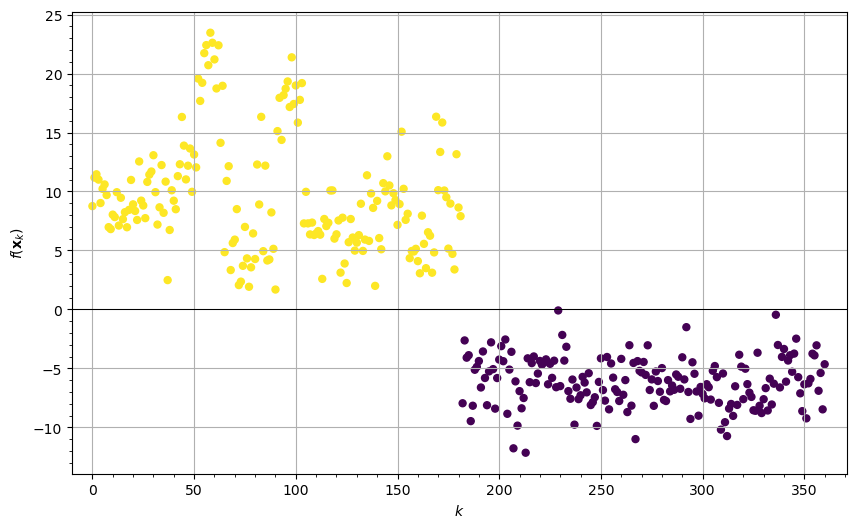

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(range(N), mod.evaluate_all(X17), c=Y17, s=25)
plt.hlines(0, -10, N+10, colors='k', linewidths=0.75)
plt.minorticks_on()
plt.grid(1)
plt.xlim(-10, N+10)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(\mathbf{x}_k)$')
plt.show()

In [28]:
mod_pairs = {}
alg_pairs = {}
pca_lst = []
for i in range(9):
    II = (Y == i)
    XI = X[II]
    pca = PCA()
    pca.fit(XI)
    UI = pca.transform(XI)
    pca_lst.append(pca)
    for j in range(10):
        if i == j:
            continue
        mod_pairs[(i,j)] = mod = models.LinearModel(64)
        IJ = (Y == j)
        YI = np.ones(len(XI), 'd')
        XJ = X[IJ]
        YJ = -np.ones(len(XJ), 'd')
        
        UJ = pca.transform(XJ)
        
        UIJ = np.concatenate((UI, UJ), axis=0)
        YIJ = np.concatenate((YI, YJ))

        alg_pairs[(i,j)] = alg = cls.classification_as_regr(
                                 UIJ, YIJ, mod,
                                 lossfunc=hinge_loss, 
                                 h=0.01, n_iter=5000)
        p = mod.param.base
        mod.param.base[:] = mod.param.base / np.sqrt(p @ p)
        print(f"({i},{j}):", metrics.accuracy_score(YIJ, np.sign(mod.evaluate_all(UIJ))))

(0,1): 1.0
(0,2): 1.0
(0,3): 1.0
(0,4): 1.0
(0,5): 1.0
(0,6): 1.0
(0,7): 1.0
(0,8): 1.0
(0,9): 1.0
(1,0): 1.0
(1,2): 1.0
(1,3): 1.0
(1,4): 1.0
(1,5): 1.0
(1,6): 1.0
(1,7): 1.0
(1,8): 1.0
(1,9): 1.0
(2,0): 1.0
(2,1): 1.0
(2,3): 1.0
(2,4): 1.0
(2,5): 1.0
(2,6): 1.0
(2,7): 1.0
(2,8): 1.0
(2,9): 1.0
(3,0): 1.0
(3,1): 1.0
(3,2): 1.0
(3,4): 1.0
(3,5): 1.0
(3,6): 1.0
(3,7): 1.0
(3,8): 1.0
(3,9): 1.0
(4,0): 1.0
(4,1): 1.0
(4,2): 1.0
(4,3): 1.0
(4,5): 1.0
(4,6): 1.0
(4,7): 1.0
(4,8): 1.0
(4,9): 1.0
(5,0): 1.0
(5,1): 1.0
(5,2): 1.0
(5,3): 1.0
(5,4): 1.0
(5,6): 1.0
(5,7): 1.0
(5,8): 1.0
(5,9): 1.0
(6,0): 1.0
(6,1): 1.0
(6,2): 1.0
(6,3): 1.0
(6,4): 1.0
(6,5): 1.0
(6,7): 1.0
(6,8): 1.0
(6,9): 1.0
(7,0): 1.0
(7,1): 1.0
(7,2): 1.0
(7,3): 1.0
(7,4): 1.0
(7,5): 1.0
(7,6): 1.0
(7,8): 1.0
(7,9): 1.0
(8,0): 1.0
(8,1): 1.0
(8,2): 1.0
(8,3): 1.0
(8,4): 1.0
(8,5): 1.0
(8,6): 1.0
(8,7): 1.0
(8,9): 1.0


In [29]:
def decision_func_array(mod_pairs, x):
    d = np.zeros((10,10), 'd')
    for i in range(9):
        pca = pca_lst[i]
        for j in range(10):
            if i == j:
                continue
            mod = mod_pairs[(i,j)]
            u = pca.transform(x[None,:])
            yp = np.sign(mod.evaluate_all(u))
            d[i,j] = yp
            d[j,i] = -yp
    return d

def decision_func(mod_pairs, x):
    d = decision_func_array(mod_pairs, x)
    return np.argmax(np.sum(d, axis=1))
    

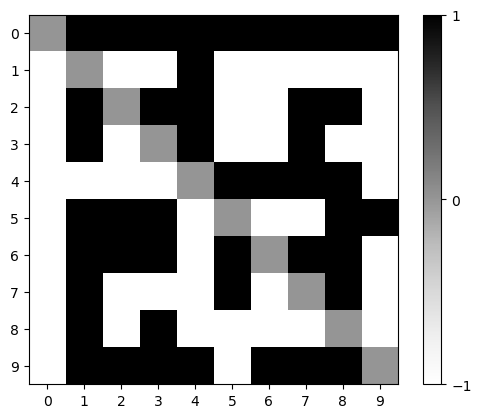

In [30]:
d = decision_func_array(mod_pairs, X[0])
cs = plt.imshow(d, cmap=plt.cm.Greys)
plt.colorbar(cs, ticks=[-1,0,1])
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

In [31]:
print(decision_func(mod_pairs, X[-1]), Y[-1])

8 8


In [32]:
for k in range(len(Y)):
    xk, yk = X[k], Y[k]
    yy = decision_func(mod_pairs, xk)
    if yy != yk:
        print(k, yk, yy)